In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Data


## Importing and Reading Data

In [3]:
# data=pd.read_csv("/content/drive/My Drive/CAPSTONE/incident_event_log.csv")
data = pd.read_csv('incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


## Exploratory Data Analysis

In [4]:
print('The number of rows in the dataset is', data.shape[0])
print('The number of columns in the dataset is', data.shape[1])



The number of rows in the dataset is 141712
The number of columns in the dataset is 36


In [5]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [6]:
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
print(numerical_data.shape,categorical_data.shape)
print('The number of rows in the Numerical data is', numerical_data.shape[0])
print('The number of columns in the Numerical data is', numerical_data.shape[1])
print('The number of rows in the Categorical data is', categorical_data.shape[0])
print('The number of columns in the Categorical data is', categorical_data.shape[1])



(141712, 3) (141712, 33)
The number of rows in the Numerical data is 141712
The number of columns in the Numerical data is 3
The number of rows in the Categorical data is 141712
The number of columns in the Categorical data is 33


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

feature:reassignment_count


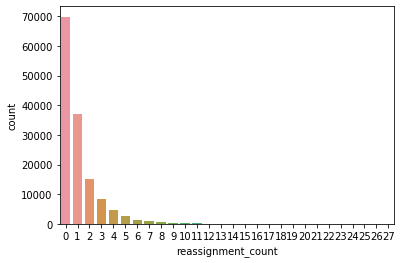

feature:reopen_count


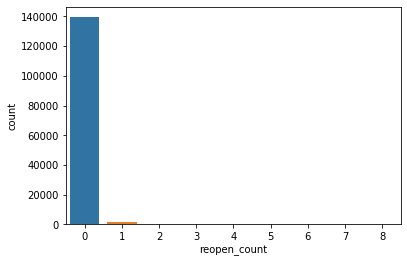

feature:sys_mod_count


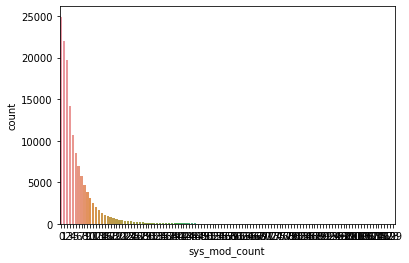

In [8]:
for i in numerical_data:
    if len(data[i].unique()):
        print(f"feature:{i}")
#         plt.title("Distribution of ",i)
        sns.countplot(data[i])
        plt.show()
        

In [9]:
for i in categorical_data:
    print(i)
    print('Number of Categories in',i, 'is', data[i].nunique() )
    print(data[i].value_counts()/data.shape[0]*100)
    print('*'*50)

number
Number of Categories in number is 24918
INC0019396    0.040928
INC0044260    0.039517
INC0005927    0.032460
INC0020718    0.031755
INC0011206    0.031049
INC0007349    0.030343
INC0025734    0.030343
INC0012815    0.028226
INC0020849    0.026815
INC0003419    0.026815
INC0032450    0.026815
INC0015902    0.026109
INC0002129    0.025404
INC0019739    0.024698
INC0010322    0.023992
INC0026226    0.023287
INC0009986    0.023287
INC0004305    0.023287
INC0007229    0.023287
INC0003256    0.023287
INC0025696    0.023287
INC0011262    0.022581
INC0012879    0.022581
INC0031099    0.022581
INC0025234    0.022581
INC0012895    0.021875
INC0020627    0.021875
INC0025993    0.021875
INC0003982    0.021875
INC0007236    0.021170
                ...   
INC0030637    0.001411
INC0015714    0.001411
INC0031888    0.001411
INC0012077    0.001411
INC0022418    0.001411
INC0012751    0.001411
INC0012673    0.001411
INC0005264    0.001411
INC0019486    0.001411
INC0001648    0.001411
INC0013071

Name: sys_updated_by, Length: 846, dtype: float64
**************************************************
sys_updated_at
Number of Categories in sys_updated_at is 50664
24/3/2016 18:40    0.296376
24/3/2016 19:00    0.285791
24/3/2016 18:51    0.282263
24/3/2016 19:01    0.277323
24/3/2016 18:41    0.272383
24/3/2016 18:50    0.260387
24/3/2016 18:59    0.245568
24/3/2016 19:02    0.190527
23/5/2016 11:07    0.151011
24/3/2016 18:52    0.098792
17/5/2016 16:07    0.053630
3/5/2016 11:07     0.050807
3/4/2016 16:59     0.047279
28/3/2016 15:59    0.047279
27/3/2016 11:59    0.046573
21/5/2016 10:07    0.045868
13/4/2016 15:59    0.044456
2/5/2016 12:07     0.044456
30/4/2016 10:07    0.044456
5/4/2016 10:59     0.044456
8/6/2016 17:07     0.044456
25/4/2016 10:07    0.043751
10/5/2016 15:07    0.043751
11/4/2016 09:59    0.042339
3/5/2016 12:07     0.042339
29/3/2016 09:59    0.042339
10/5/2016 16:07    0.042339
28/3/2016 14:59    0.041634
4/5/2016 12:07     0.041634
28/3/2016 10:59    0.041

Number of Categories in priority is 4
3 - Moderate    93.465620
4 - Low          2.843796
2 - High         2.097211
1 - Critical     1.593372
Name: priority, dtype: float64
**************************************************
assignment_group
Number of Categories in assignment_group is 79
Group 70    30.677713
?           10.029496
Group 25     5.418737
Group 24     4.764593
Group 20     4.353901
Group 39     3.336344
Group 23     2.983516
Group 27     2.693491
Group 28     2.567179
Group 73     2.331489
Group 65     2.012532
Group 55     1.693576
Group 64     1.584199
Group 72     1.566558
Group 54     1.525629
Group 66     1.495286
Group 57     1.429660
Group 10     1.418370
Group 29     1.342159
Group 6      1.212318
Group 9      1.161511
Group 22     1.089534
Group 30     0.845377
Group 76     0.821384
Group 33     0.815033
Group 31     0.796686
Group 56     0.759286
Group 5      0.704245
Group 69     0.676725
Group 37     0.670374
              ...    
Group 68     0.130546
Group 26

Resolved by 15     10.881930
Resolved by 11      8.503161
Resolved by 103     3.782319
Resolved by 177     2.689257
Resolved by 53      2.566473
Resolved by 62      2.510726
Resolved by 133     2.177656
Resolved by 166     1.794485
Resolved by 180     1.731681
Resolved by 22      1.648414
Resolved by 32      1.632889
Resolved by 227     1.568674
Resolved by 196     1.519984
Resolved by 66      1.476939
Resolved by 71      1.476233
Resolved by 30      1.473411
Resolved by 215     1.472000
Resolved by 126     1.462120
Resolved by 113     1.246895
Resolved by 114     1.124817
Resolved by 85      1.095179
Resolved by 208     1.037315
Resolved by 33      1.030964
Resolved by 134     0.975923
Resolved by 27      0.945580
Resolved by 158     0.944168
Resolved by 231     0.932878
Resolved by 212     0.922999
Resolved by 153     0.873603
Resolved by 52      0.819267
                     ...    
Resolved by 10      0.010585
Resolved by 230     0.010585
Resolved by 18      0.010585
Resolved by 94

### Null Values Treatment

In [10]:
data.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [11]:
# we have `?` for missing values so replacing it with NaN
data = data.replace('?',np.nan)
print('The Null Values present in the data are: ')
data.isnull().sum()[data.isnull().sum()>0]

The Null Values present in the data are: 


caller_id               29
opened_by             4835
sys_created_by       53076
sys_created_at       53076
location                76
category                78
subcategory            111
u_symptom            32964
cmdb_ci             141267
assignment_group     14213
assigned_to          27496
problem_id          139417
rfc                 140721
vendor              141468
caused_by           141689
closed_code            714
resolved_by            226
resolved_at           3141
dtype: int64

In [12]:
# getting missing percent
missing_val_per=round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)
missing_val_per



caused_by                  99.98
vendor                     99.83
cmdb_ci                    99.69
rfc                        99.30
problem_id                 98.38
sys_created_at             37.45
sys_created_by             37.45
u_symptom                  23.26
assigned_to                19.40
assignment_group           10.03
opened_by                   3.41
resolved_at                 2.22
closed_code                 0.50
resolved_by                 0.16
subcategory                 0.08
category                    0.06
location                    0.05
caller_id                   0.02
reassignment_count          0.00
active                      0.00
incident_state              0.00
reopen_count                0.00
sys_mod_count               0.00
made_sla                    0.00
opened_at                   0.00
closed_at                   0.00
sys_updated_by              0.00
sys_updated_at              0.00
contact_type                0.00
impact                      0.00
urgency   

In [13]:
# removing columns which have more than 30% missing values
data1 = data.drop(['caused_by','vendor','cmdb_ci','rfc','problem_id','sys_created_at','sys_created_by'],axis=1)

In [14]:
#checking missing percent after removing redundant columns
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per



u_symptom                  23.26
assigned_to                19.40
assignment_group           10.03
opened_by                   3.41
resolved_at                 2.22
closed_code                 0.50
resolved_by                 0.16
subcategory                 0.08
category                    0.06
location                    0.05
caller_id                   0.02
opened_at                   0.00
sys_mod_count               0.00
made_sla                    0.00
reassignment_count          0.00
active                      0.00
incident_state              0.00
reopen_count                0.00
closed_at                   0.00
sys_updated_by              0.00
sys_updated_at              0.00
contact_type                0.00
impact                      0.00
urgency                     0.00
priority                    0.00
knowledge                   0.00
u_priority_confirmation     0.00
notify                      0.00
number                      0.00
dtype: float64

In [15]:
# checking numerical and cateogircal distribution after removing redundant columns
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 3) (141712, 26)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 3
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 26


## Imputing Null values :

In [16]:
# imputing categorical columns with mode
for i in ['u_symptom','assigned_to','assignment_group','opened_by','closed_code','resolved_by','subcategory','category','location','caller_id']:
    data1[i]=data1[i].fillna(data1[i].mode()[0])
    

In [17]:
# checking missing percent after imputation
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per

resolved_at                2.22
closed_at                  0.00
location                   0.00
incident_state             0.00
active                     0.00
reassignment_count         0.00
reopen_count               0.00
sys_mod_count              0.00
made_sla                   0.00
caller_id                  0.00
opened_by                  0.00
opened_at                  0.00
sys_updated_by             0.00
sys_updated_at             0.00
contact_type               0.00
category                   0.00
subcategory                0.00
u_symptom                  0.00
impact                     0.00
urgency                    0.00
priority                   0.00
assignment_group           0.00
assigned_to                0.00
knowledge                  0.00
u_priority_confirmation    0.00
notify                     0.00
closed_code                0.00
resolved_by                0.00
number                     0.00
dtype: float64

In [18]:
# resolved at is date column so its better to fill null values with forward filling
data1['resolved_at'].fillna(method='ffill', inplace=True)

In [19]:
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per

closed_at                  0.0
location                   0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
category                   0.0
resolved_at                0.0
subcategory                0.0
u_symptom                  0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
closed_code                0.0
resolved_by                0.0
number                     0.0
dtype: float64

## Data Preprocessing:



In [20]:
# here we see a lot of columns which are actually dates but not categories
dates = ['sys_updated_at', 'opened_at', 'resolved_at', 'closed_at']

# updating datatype of the date columns

for feat in dates:
    data1[feat] = pd.to_datetime(data1[feat], format='%d/%m/%Y %H:%M')

# check their new datataype    
data1[dates].dtypes

sys_updated_at    datetime64[ns]
opened_at         datetime64[ns]
resolved_at       datetime64[ns]
closed_at         datetime64[ns]
dtype: object

### Outliers

In [21]:
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 3) (141712, 26)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 3
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 26


reassignment_count


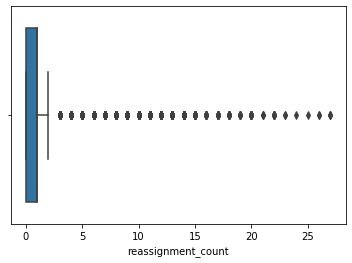

**************************************************
reopen_count


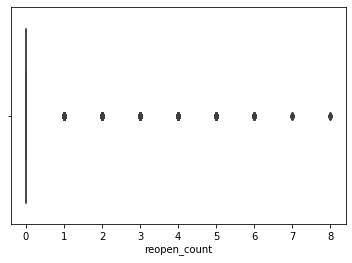

**************************************************
sys_mod_count


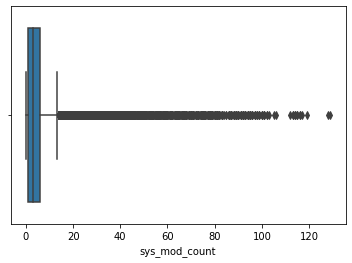

**************************************************


In [22]:
for i in numerical_data1:
    print(i)
    sns.boxplot(data1[i])
    plt.show()
    print('*'*50)

**Inference:**
    Using transformation instead of outlier treeatment so we dont loose data information.

In [23]:
# checking basic stats
numerical_data1.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


## Transforming data:

In [24]:
data1['reassignment_count'] = np.power(data1['reassignment_count'], 1/2)

data1['sys_mod_count'] = np.power(data1['sys_mod_count'], 1/2)



reassignment_count


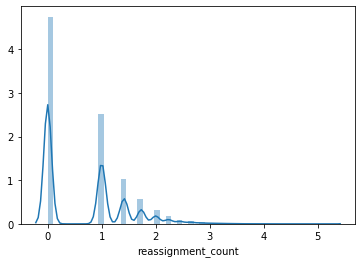

**************************************************
reopen_count


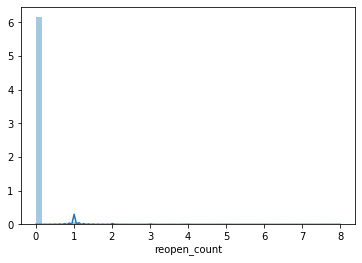

**************************************************
sys_mod_count


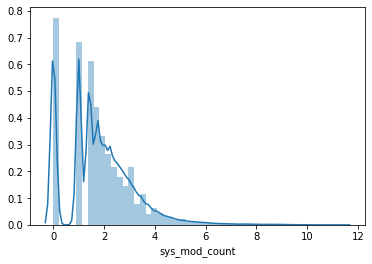

**************************************************


In [25]:
# CHECKING TRANFORMED COLUMNS VISUALLY
for i in numerical_data1.columns:
    print(i)
    sns.distplot(data1[i])
    plt.show()
    print('*'*50)

reassignment_count


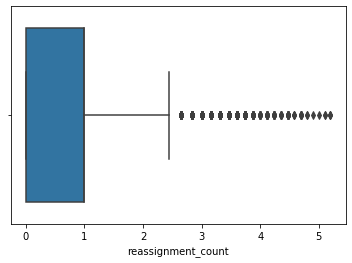

**************************************************
reopen_count


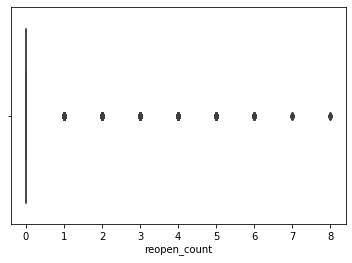

**************************************************
sys_mod_count


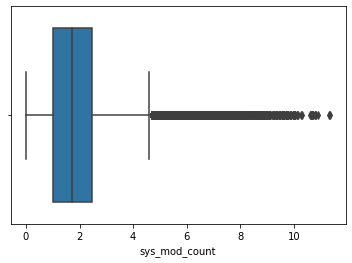

**************************************************


In [26]:
for i in numerical_data1.columns:
    print(i)
    sns.boxplot(data1[i])
    plt.show()
    print('*'*50)

## Feature Engineering:

In [27]:
# creating predicted_closed_days column to predict sla timeline
data1['predicted_closed_days']=(data1.closed_at- data1.opened_at).dt.total_seconds()/ (24 * 60 * 60)
data1['predicted_closed_days'].describe()

count    141712.000000
mean         17.062177
std          27.156357
min           0.000000
25%           5.213194
50%           9.373611
75%          17.406250
max         341.275694
Name: predicted_closed_days, dtype: float64

In [28]:
# separating opened_at column for days, month, time
data1['opened_month']=data1.opened_at.dt.month
data1['opened_day'] = data1.opened_at.dt.day
data1['opened_hour'] = data1.opened_at.dt.hour
data1['opened_minute'] = data1.opened_at.dt.minute

In [29]:
# separating sys_updated_at column for days, month, time
data1['sys_updated_month']=data1.sys_updated_at.dt.month
data1['sys_updated_day'] = data1.sys_updated_at.dt.day
data1['sys_updated_hour'] = data1.sys_updated_at.dt.hour
data1['sys_updated_minute'] = data1.sys_updated_at.dt.minute

In [72]:
# filtering data for unresolved and not closed incidents

data2 = data1[(data1.incident_state!='Resolved')&(data1.incident_state!='Closed')]
data2 = data2.drop(['opened_at', 'sys_updated_at', 'resolved_at', 'closed_code', 'closed_at'], axis=1)

data2 = data2.reset_index()

In [73]:
feat_cat = data2.select_dtypes(['object','bool'])
feat_num = data2.select_dtypes(np.number)


In [74]:

feat_cat.head(2)

,number,incident_state,active,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,...,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,resolved_by
0,INC0000045,New,True,True,Caller 2403,Opened by 8,Updated by 21,Phone,Location 143,Category 55,...,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,Resolved by 149
1,INC0000047,New,True,True,Caller 2403,Opened by 397,Updated by 746,Phone,Location 165,Category 40,...,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,Resolved by 81


In [75]:
feat_num.head(2)

,index,reassignment_count,reopen_count,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
0,0,0.0,0,0.0,5.447222,2,29,1,16,2,29,1,23
1,4,0.0,0,0.0,6.222222,2,29,4,40,2,29,4,57


In [76]:
data2

,index,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,...,resolved_by,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
0,0,INC0000045,New,True,0.000000,0,0.000000,True,Caller 2403,Opened by 8,...,Resolved by 149,5.447222,2,29,1,16,2,29,1,23
1,4,INC0000047,New,True,0.000000,0,0.000000,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,4,57
2,5,INC0000047,Active,True,1.000000,0,1.000000,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,5,30
3,6,INC0000047,Active,True,1.000000,0,1.414214,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,5,33
4,7,INC0000047,Active,True,1.000000,0,1.732051,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,11,31
5,8,INC0000047,Active,True,1.000000,0,2.000000,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,11,32
6,9,INC0000047,Active,True,1.000000,0,2.236068,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,3,1,9,14
7,10,INC0000047,Awaiting User Info,True,1.000000,0,2.449490,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,3,1,9,14
8,13,INC0000057,New,True,0.000000,0,0.000000,True,Caller 4416,Opened by 8,...,Resolved by 5,5.868056,2,29,6,10,2,29,6,26
9,14,INC0000057,New,True,0.000000,0,1.000000,True,Caller 4416,Opened by 8,...,Resolved by 5,5.868056,2,29,6,10,2,29,6,38


In [77]:
# applying label encoding to ordinal data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feat_cat_encoded= feat_cat.apply(le.fit_transform)


In [78]:
# scaling numerical data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
feat_num_scaled = ss.fit_transform(feat_num)

feat_num_scaled = pd.DataFrame(feat_num_scaled, columns=feat_num.columns)

In [79]:
#combining the encoded and scaled the data
data_final = pd.concat([feat_cat_encoded, feat_num_scaled], axis=1)
data_final.head(10)

,number,incident_state,active,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,...,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
0,0,6,0,1,1411,200,95,3,42,46,...,-1.182459,-0.468391,-1.861618,1.610562,-2.753292,-0.780353,-1.800829,1.583411,-2.828802,-0.390750
1,1,6,0,1,1411,120,548,3,61,30,...,-1.182459,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-2.082122,1.573121
2,1,1,0,1,1411,120,95,3,61,30,...,-0.447187,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-1.833229,0.013577
3,1,1,0,1,1411,120,95,3,61,30,...,-0.142627,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-1.833229,0.186859
4,1,1,0,1,1411,120,596,3,61,30,...,0.091070,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-0.339870,0.071338
5,1,1,0,1,1411,120,509,3,61,30,...,0.288085,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-0.339870,0.129099
6,1,1,0,1,1411,120,194,3,61,30,...,0.461659,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-0.878200,-1.578000,-0.837656,-0.910598
7,1,4,0,1,1411,120,194,3,61,30,...,0.618582,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-0.878200,-1.578000,-0.837656,-0.910598
8,2,6,0,1,3432,200,95,3,102,9,...,-1.182459,-0.454014,-1.861618,1.610562,-1.489215,-1.128065,-1.800829,1.583411,-1.584336,-0.217467
9,2,6,0,1,3432,200,95,3,102,9,...,-0.447187,-0.454014,-1.861618,1.610562,-1.489215,-1.128065,-1.800829,1.583411,-1.584336,0.475664


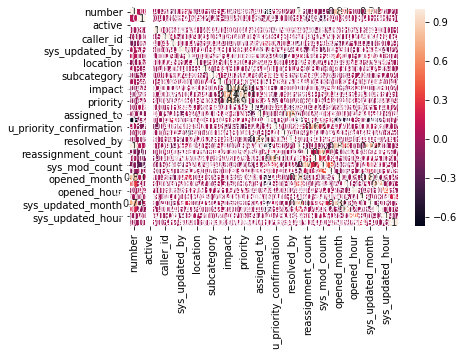

In [80]:
# checking correlation 
plt.figure(figsize=(20,6))
sns.heatmap(data_final.corr(),annot=True)
plt.show()

In [81]:
abs(data_final.corr()['predicted_closed_days']).sort_values(ascending = False)

predicted_closed_days      1.000000
sys_mod_count              0.389716
sys_updated_month          0.205064
reassignment_count         0.131307
knowledge                  0.110417
index                      0.105101
number                     0.101566
resolved_by                0.096888
assigned_to                0.080949
made_sla                   0.064550
opened_day                 0.061490
opened_month               0.060214
sys_updated_by             0.052028
u_priority_confirmation    0.046838
reopen_count               0.045140
priority                   0.043730
impact                     0.043226
urgency                    0.039736
sys_updated_day            0.038516
assignment_group           0.035585
subcategory                0.030830
sys_updated_hour           0.027684
opened_hour                0.025439
contact_type               0.023143
incident_state             0.018432
u_symptom                  0.018341
opened_minute              0.010913
caller_id                  0

In [82]:
numerical_data_final = data_final.select_dtypes(include=[np.number])
categorical_data_final = data_final.select_dtypes(exclude=[np.number])
print(numerical_data_final.shape,categorical_data_final.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data_final.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data_final.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data_final.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data_final.shape[1])


(90976, 34) (90976, 0)
The number of rows in the Numerical data after dropping null values 90976
The number of columns in the Numerical data after dropping null values 34
The number of rows in the Categorical data after dropping null values 90976
The number of columns in the Categorical data after dropping null values 0


In [83]:
from scipy.stats import chi2_contingency

In [84]:
categorical_datadrop=categorical_data1.drop('closed_at',axis=1)

In [122]:
non_sigificant=[]
for i in categorical_datadrop:
    print(i)
    print('H0:',i, 'is not significant to closed_at')
    print('Ha:',i,'is significant to closed_at')
    obs = pd.crosstab(data2[i],data2['closed_at'])
    chi, p_val, ddof, expected = chi2_contingency(obs)
    print('pval : ', p_val)
    if p_val<0.05:
        print('We are rejecting the null hypothesis', i , 'is significant to closed_at\n')
    else:
        print('We are accepting the null hypothesis', i, 'is not significant to closed_at\n')
        non_sigificant.append(i)
print('The Varible not significant to closed_at is', non_sigificant)

number
H0: number is not significant to closed_at
Ha: number is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis number is significant to closed_at

incident_state
H0: incident_state is not significant to closed_at
Ha: incident_state is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis incident_state is significant to closed_at

active
H0: active is not significant to closed_at
Ha: active is significant to closed_at
pval :  0.9038401186262924
We are accepting the null hypothesis active is not significant to closed_at

made_sla
H0: made_sla is not significant to closed_at
Ha: made_sla is significant to closed_at
pval :  4.701477931610207e-205
We are rejecting the null hypothesis made_sla is significant to closed_at

caller_id
H0: caller_id is not significant to closed_at
Ha: caller_id is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis caller_id is significant to closed_at

opened_by
H0: opened_by is not significa

In [ ]:
data

In [85]:
X=data2.drop("predicted_closed_days",axis=1)
y=data2["predicted_closed_days"]

In [86]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(X)

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({"vif":vif[1:]},index=X.columns).T

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at
vif,1.773509,1.283972,2.271218,1.458181,1.10522,1.602128,1.613887,1.006735,1.05212,1.441351,...,5.143297,10.362985,1.094129,2.208014,1.858746,1.825191,1.311205,1.021941,2.179713,1.290851


In [329]:
df = data1[['number','opened_at', 'closed_at', 'predicted_closed_time', 'resolved_at', 'sys_updated_at', 'incident_state']]

count    141712.000000
mean         17.062177
std          27.156357
min           0.000000
25%           5.213194
50%           9.373611
75%          17.406250
max         341.275694
Name: predicted_closed_days, dtype: float64

In [357]:
data_final.head(2)

,incident_state_Active,incident_state_Awaiting Evidence,incident_state_Awaiting Problem,incident_state_Awaiting User Info,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,contact_type_Email,contact_type_IVR,...,opened_by,impact,resolved_by,category,reassignment_count,reopen_count,sys_mod_count,sys_updated_at,opened_at,predicted_closed_time
0,0,0,0,0,0,0,1,0,0,0,...,200,1,51,46,-0.896264,-0.105729,-1.343676,29/2/2016 01:23,2016-02-29 01:16:00,5 days 10:44:00
1,0,0,0,0,0,0,0,1,0,0,...,200,1,51,46,-0.896264,-0.105729,-0.292815,29/2/2016 08:53,2016-02-29 01:16:00,5 days 10:44:00


In [87]:
X=data_final.drop(["predicted_closed_days"],axis=1)
y=data_final["predicted_closed_days"]

In [88]:
type(X_constant), type(y), type(X)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

In [89]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(X)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.354
Model:                               OLS   Adj. R-squared:                  0.354
Method:                    Least Squares   F-statistic:                     1558.
Date:                   Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                           19:01:16   Log-Likelihood:            -1.0921e+05
No. Observations:                  90976   AIC:                         2.185e+05
Df Residuals:                      90943   BIC:                         2.188e+05
Df Model:                             32                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3615      0.174     -7.842      0.000      -1.702      -1.021
number                   3.548e-05   1.01e-05      3.522      0.000    1.57e-05    5.52e-05
incident_state              0.0250      0.001     20.258      0.000       0.023       0.027
active                  -1.139e-11   2.71e-12     -4.201      0.000   -1.67e-11   -6.07e-12
made_sla                   -0.2623      0.114     -2.291      0.022      -0.487      -0.038
caller_id                3.908e-06   1.83e-06      2.141      0.032     3.3e-07    7.49e-06
opened_by               -1.259e-05   4.22e-05     -0.299      0.765   -9.52e-05       7e-05
sys_updated_by          -2.517e-05   1.17e-05     -2.158      0.031    -4.8e-05   -2.31e-06
contact_type                0.2768      0.027     10.221      0.000       0.224       0.330
location                 1.241e-05   4.18e-05      0.297      0.766   -6.95e-05    9.43e-05
category                   -0.0004      0.000     -1.917      0.055      -0.001    7.96e-06
subcategory                -0.0002   4.24e-05     -4.966      0.000      -0.000      -0.000
u_symptom               -1.669e-05   2.35e-05     -0.710      0.478   -6.27e-05    2.94e-05
impact                     -0.0080      0.026     -0.310      0.756      -0.058       0.042
urgency                    -0.0734      0.026     -2.837      0.005      -0.124      -0.023
priority                    0.1512      0.026      5.845      0.000       0.100       0.202
assignment_group            0.0007      0.000      5.371      0.000       0.000       0.001
assigned_to                -0.0001   6.48e-05     -1.767      0.077      -0.000    1.25e-05
knowledge                   0.0897      0.015      5.814      0.000       0.059       0.120
u_priority_confirmation     0.0266      0.025      1.072      0.284      -0.022       0.075
notify                      0.4779      0.129      3.696      0.000       0.224       0.731
resolved_by                 0.0013   5.85e-05     22.592      0.000       0.001       0.001
index                      -0.3728      0.071     -5.227      0.000      -0.513      -0.233
reassignment_count         -0.1172      0.004    -28.817      0.000      -0.125      -0.109
reopen_count               -0.0346      0.004     -9.769      0.000      -0.042      -0.028
sys_mod_count               0.2180      0.005     42.795      0.000       0.208       0.228
opened_month               -0.7967      0.008    -93.993      0.000      -0.813      -0.780
opened_day                 -0.2327      0.005    -50.297      0.000      -0.242      -0.224
opened_hour             -4.805e-05      0.003     -0.016      0.987      -0.006       0.006
opened_minute              -0.0063      0.003     -2.325      0.020      -0.012      -0.001
sys_updated_mo

In [90]:
**Inference:**
    - the data has high multicolinearity 

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=X.columns.tolist()
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# pd.DataFrame({"vif":vif[1:]},index=X.columns).sort_values(ascending=False)


In [92]:
vif.sort_values(by='vif',ascending=False)

,columns,vif
0,number,1485.104015
3,made_sla,1015.169766
7,contact_type,760.827720
21,index,490.311390
14,priority,372.269508
13,urgency,97.864441
12,impact,97.290632
25,opened_month,9.828870
11,u_symptom,9.233036
16,assigned_to,8.018025


In [108]:
inp1 = X.drop(['number', 'made_sla', 'priority', 'contact_type', 'impact', 'opened_month'], axis=1)


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=inp1.columns.tolist()
vif['vif']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,columns,vif
9,urgency,13.431221
8,u_symptom,8.160209
11,assigned_to,7.611780
15,resolved_by,5.682653
6,category,5.011168
10,assignment_group,4.720899
16,index,4.265297
2,caller_id,3.888622
7,subcategory,3.731139
4,sys_updated_by,3.604814


In [112]:
# checking model after removing columns causing high multi-colinearity
X_constant=sm.add_constant(inp1)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.289
Model:                               OLS   Adj. R-squared:                  0.289
Method:                    Least Squares   F-statistic:                     1421.
Date:                   Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                           19:12:11   Log-Likelihood:            -1.1358e+05
No. Observations:                  90976   AIC:                         2.272e+05
Df Residuals:                      90949   BIC:                         2.275e+05
Df Model:                             26                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4523      0.022    -20.896      0.000      -0.495      -0.410
incident_state              0.0361      0.001     28.012      0.000       0.034       0.039
active                  -3.691e-14   4.22e-15     -8.743      0.000   -4.52e-14   -2.86e-14
caller_id                4.671e-06   1.91e-06      2.440      0.015    9.18e-07    8.42e-06
opened_by               -6.733e-05   4.41e-05     -1.526      0.127      -0.000    1.92e-05
sys_updated_by           1.353e-05   1.22e-05      1.107      0.268   -1.04e-05    3.75e-05
location                 5.834e-05   4.38e-05      1.332      0.183   -2.75e-05       0.000
category                   -0.0007      0.000     -3.676      0.000      -0.001      -0.000
subcategory                -0.0003   4.45e-05     -6.348      0.000      -0.000      -0.000
u_symptom                4.506e-05   2.46e-05      1.829      0.067   -3.22e-06    9.33e-05
urgency                     0.1599      0.012     13.082      0.000       0.136       0.184
assignment_group            0.0011      0.000      8.478      0.000       0.001       0.001
assigned_to             -4.443e-05   6.79e-05     -0.654      0.513      -0.000    8.86e-05
knowledge                   0.0524      0.010      5.158      0.000       0.032       0.072
u_priority_confirmation     0.0215      0.025      0.844      0.399      -0.028       0.071
notify                     -0.0403      0.123     -0.327      0.744      -0.282       0.201
resolved_by                 0.0014   6.12e-05     23.617      0.000       0.001       0.002
index                      -0.4282      0.006    -73.784      0.000      -0.440      -0.417
reassignment_count         -0.2104      0.004    -50.872      0.000      -0.218      -0.202
reopen_count               -0.0495      0.004    -13.447      0.000      -0.057      -0.042
sys_mod_count               0.4398      0.005     93.032      0.000       0.431       0.449
opened_day                 -0.0048      0.004     -1.172      0.241      -0.013       0.003
opened_hour                 0.0140      0.003      4.433      0.000       0.008       0.020
opened_minute              -0.0062      0.003     -2.166      0.030      -0.012      -0.001
sys_updated_month           0.4619      0.005     90.457      0.000       0.452       0.472
sys_updated_day             0.1010      0.004     24.564      0.000       0.093       0.109
sys_updated_hour            0.0167      0.003      5.262      0.000       0.010       0.023
sys_updated_minute          0.0101      0.003      3.543      0.000       0.005       0.016
==============================================================================
Omnibus:                    90840.876   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   

In [122]:
significant_features = ols_mod.pvalues[ols_mod.pvalues < 0.05].index
insignificant_features = ols_mod.pvalues[ols_mod.pvalues > 0.05].index.tolist()

In [123]:
insignificant_features

['opened_by',
 'sys_updated_by',
 'location',
 'u_symptom',
 'assigned_to',
 'u_priority_confirmation',
 'notify',
 'opened_day']

In [125]:
inp2 = inp1.drop(insignificant_features, axis=1)

In [126]:
# checking model after using columns with signifact features
X_constant=sm.add_constant(inp2)

ols = sm.OLS(y, X_constant)
ols_mod3 = ols.fit()
ols_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.289
Model:                               OLS   Adj. R-squared:                  0.289
Method:                    Least Squares   F-statistic:                     2052.
Date:                   Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                           19:15:15   Log-Likelihood:            -1.1359e+05
No. Observations:                  90976   AIC:                         2.272e+05
Df Residuals:                      90957   BIC:                         2.274e+05
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4361      0.018    -24.187      0.000      -0.471      -0.401
incident_state         0.0362      0.001     28.156      0.000       0.034       0.039
active             -1.218e-15   4.94e-17    -24.675      0.000   -1.32e-15   -1.12e-15
caller_id           4.639e-06   1.91e-06      2.427      0.015    8.93e-07    8.38e-06
category              -0.0007      0.000     -3.625      0.000      -0.001      -0.000
subcategory           -0.0003   4.43e-05     -6.099      0.000      -0.000      -0.000
urgency                0.1599      0.012     13.327      0.000       0.136       0.183
assignment_group       0.0011      0.000      8.648      0.000       0.001       0.001
knowledge              0.0527      0.010      5.366      0.000       0.033       0.072
resolved_by            0.0014   4.71e-05     30.050      0.000       0.001       0.002
index                 -0.4280      0.006    -73.881      0.000      -0.439      -0.417
reassignment_count    -0.2100      0.004    -51.004      0.000      -0.218      -0.202
reopen_count          -0.0474      0.003    -16.405      0.000      -0.053      -0.042
sys_mod_count          0.4394      0.005     93.570      0.000       0.430       0.449
opened_hour            0.0143      0.003      4.532      0.000       0.008       0.020
opened_minute         -0.0062      0.003     -2.172      0.030      -0.012      -0.001
sys_updated_month      0.4620      0.005     90.582      0.000       0.452       0.472
sys_updated_day        0.0978      0.003     30.629      0.000       0.092       0.104
sys_updated_hour       0.0165      0.003      5.232      0.000       0.010       0.023
sys_updated_minute     0.0101      0.003      3.538      0.000       0.005       0.016
==============================================================================
Omnibus:                    90826.207   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5357055.125
Skew:                           4.966   Prob(JB):                         0.00
Kurtosis:                      39.257   Cond. No.                     3.80e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.5e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [128]:
from sklearn.ensemble import RandomForestRegressor

rfe = RandomForestRegressor(random_state=0)
rfe.fit(inp1, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

<BarContainer object of 27 artists>

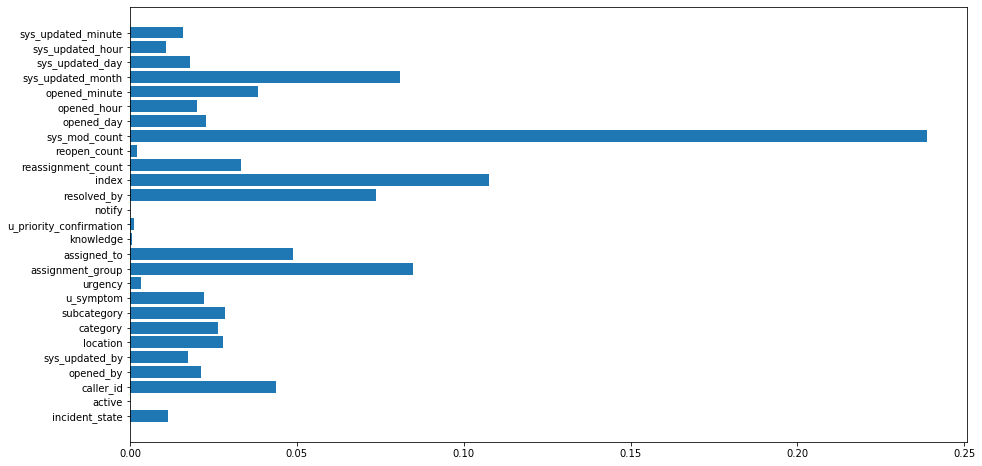

In [134]:
plt.figure(figsize=(15,8))
plt.barh(inp1.columns,rfe.feature_importances_)

In [135]:
rfe.score(inp1, y)

0.9630211749702938